### Import Dependencies

In [1]:
from astropy.io import fits
import os 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Filepaths

In [69]:
# REPLACE BELOW IF NOT SAM
data_path = "/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/data/samples"
hsc_path = os.path.join(data_path,"hsc/filtered")
hst_path = os.path.join(data_path,"hst/filtered")


### Collect Pixel Sums

In [70]:
files = os.listdir(hst_path)
pixel_sums = []
for fname in files:
    file_path = os.path.join(hst_path,fname)
    cutout = fits.open(file_path)
#     print(type(cutout[0].data))
#     break
    pixel_sum = np.sum(cutout[0].data)
    pixel_sums.append({"pixel_sum":pixel_sum,"file":fname})

### Pixel Sum Distribution 

In [71]:
pixel_df = pd.DataFrame(pixel_sums)
pixel_df["log_sum"] = pixel_df["pixel_sum"].apply(lambda row: np.log(row))

Text(0.5, 0, 'Pixel Sum')

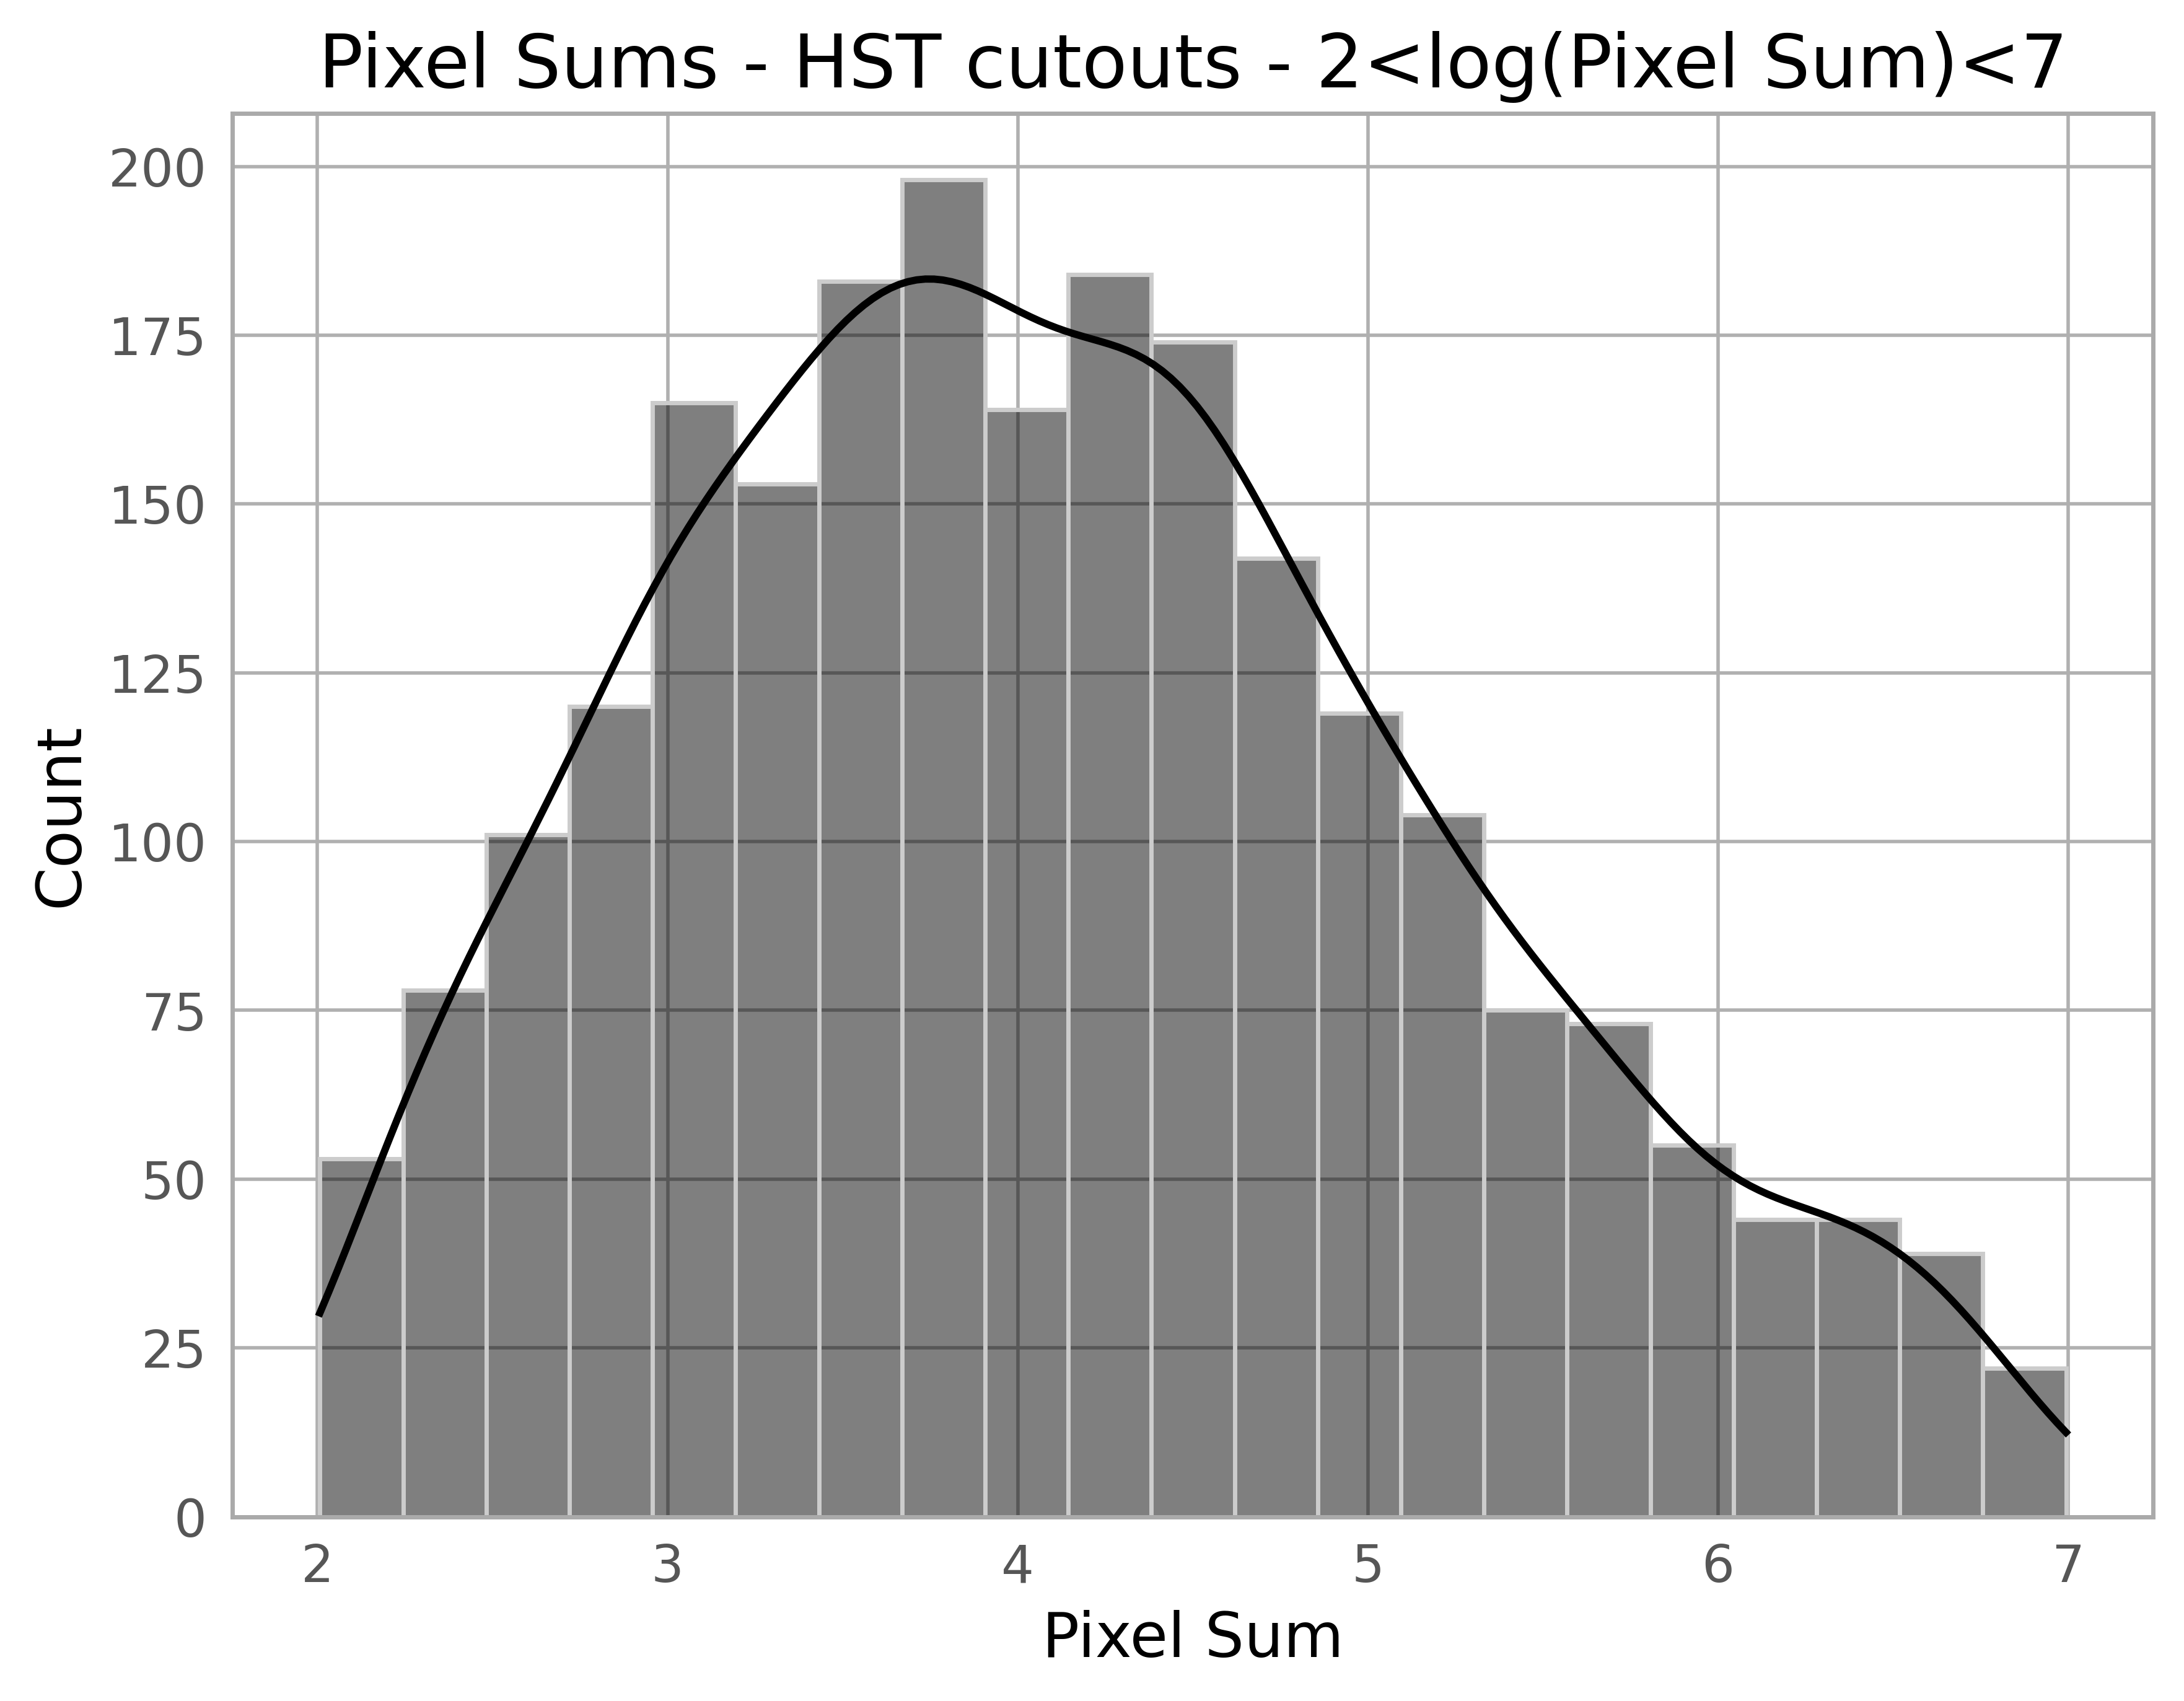

In [72]:

sns.histplot(pixel_df["log_sum"],kde=True,color="black")
# plt.xlim(0,1000)
plt.title("Pixel Sums - HST cutouts - 2<log(Pixel Sum)<7")
plt.xlabel("Pixel Sum")

### Best Fit Distribution

,sumsquare_error,aic,bic,kl_div
halfcauchy,9.018155e-07,2259.299864,-108860.792578,inf
gilbrat,1.069383e-06,2776.505881,-108032.685802,inf
johnsonsb,1.074020e-06,2559.809212,-107994.686312,inf
lognorm,1.084356e-06,2555.157994,-107956.637027,inf
fatiguelife,2.967013e-06,2771.531149,-103065.714735,inf


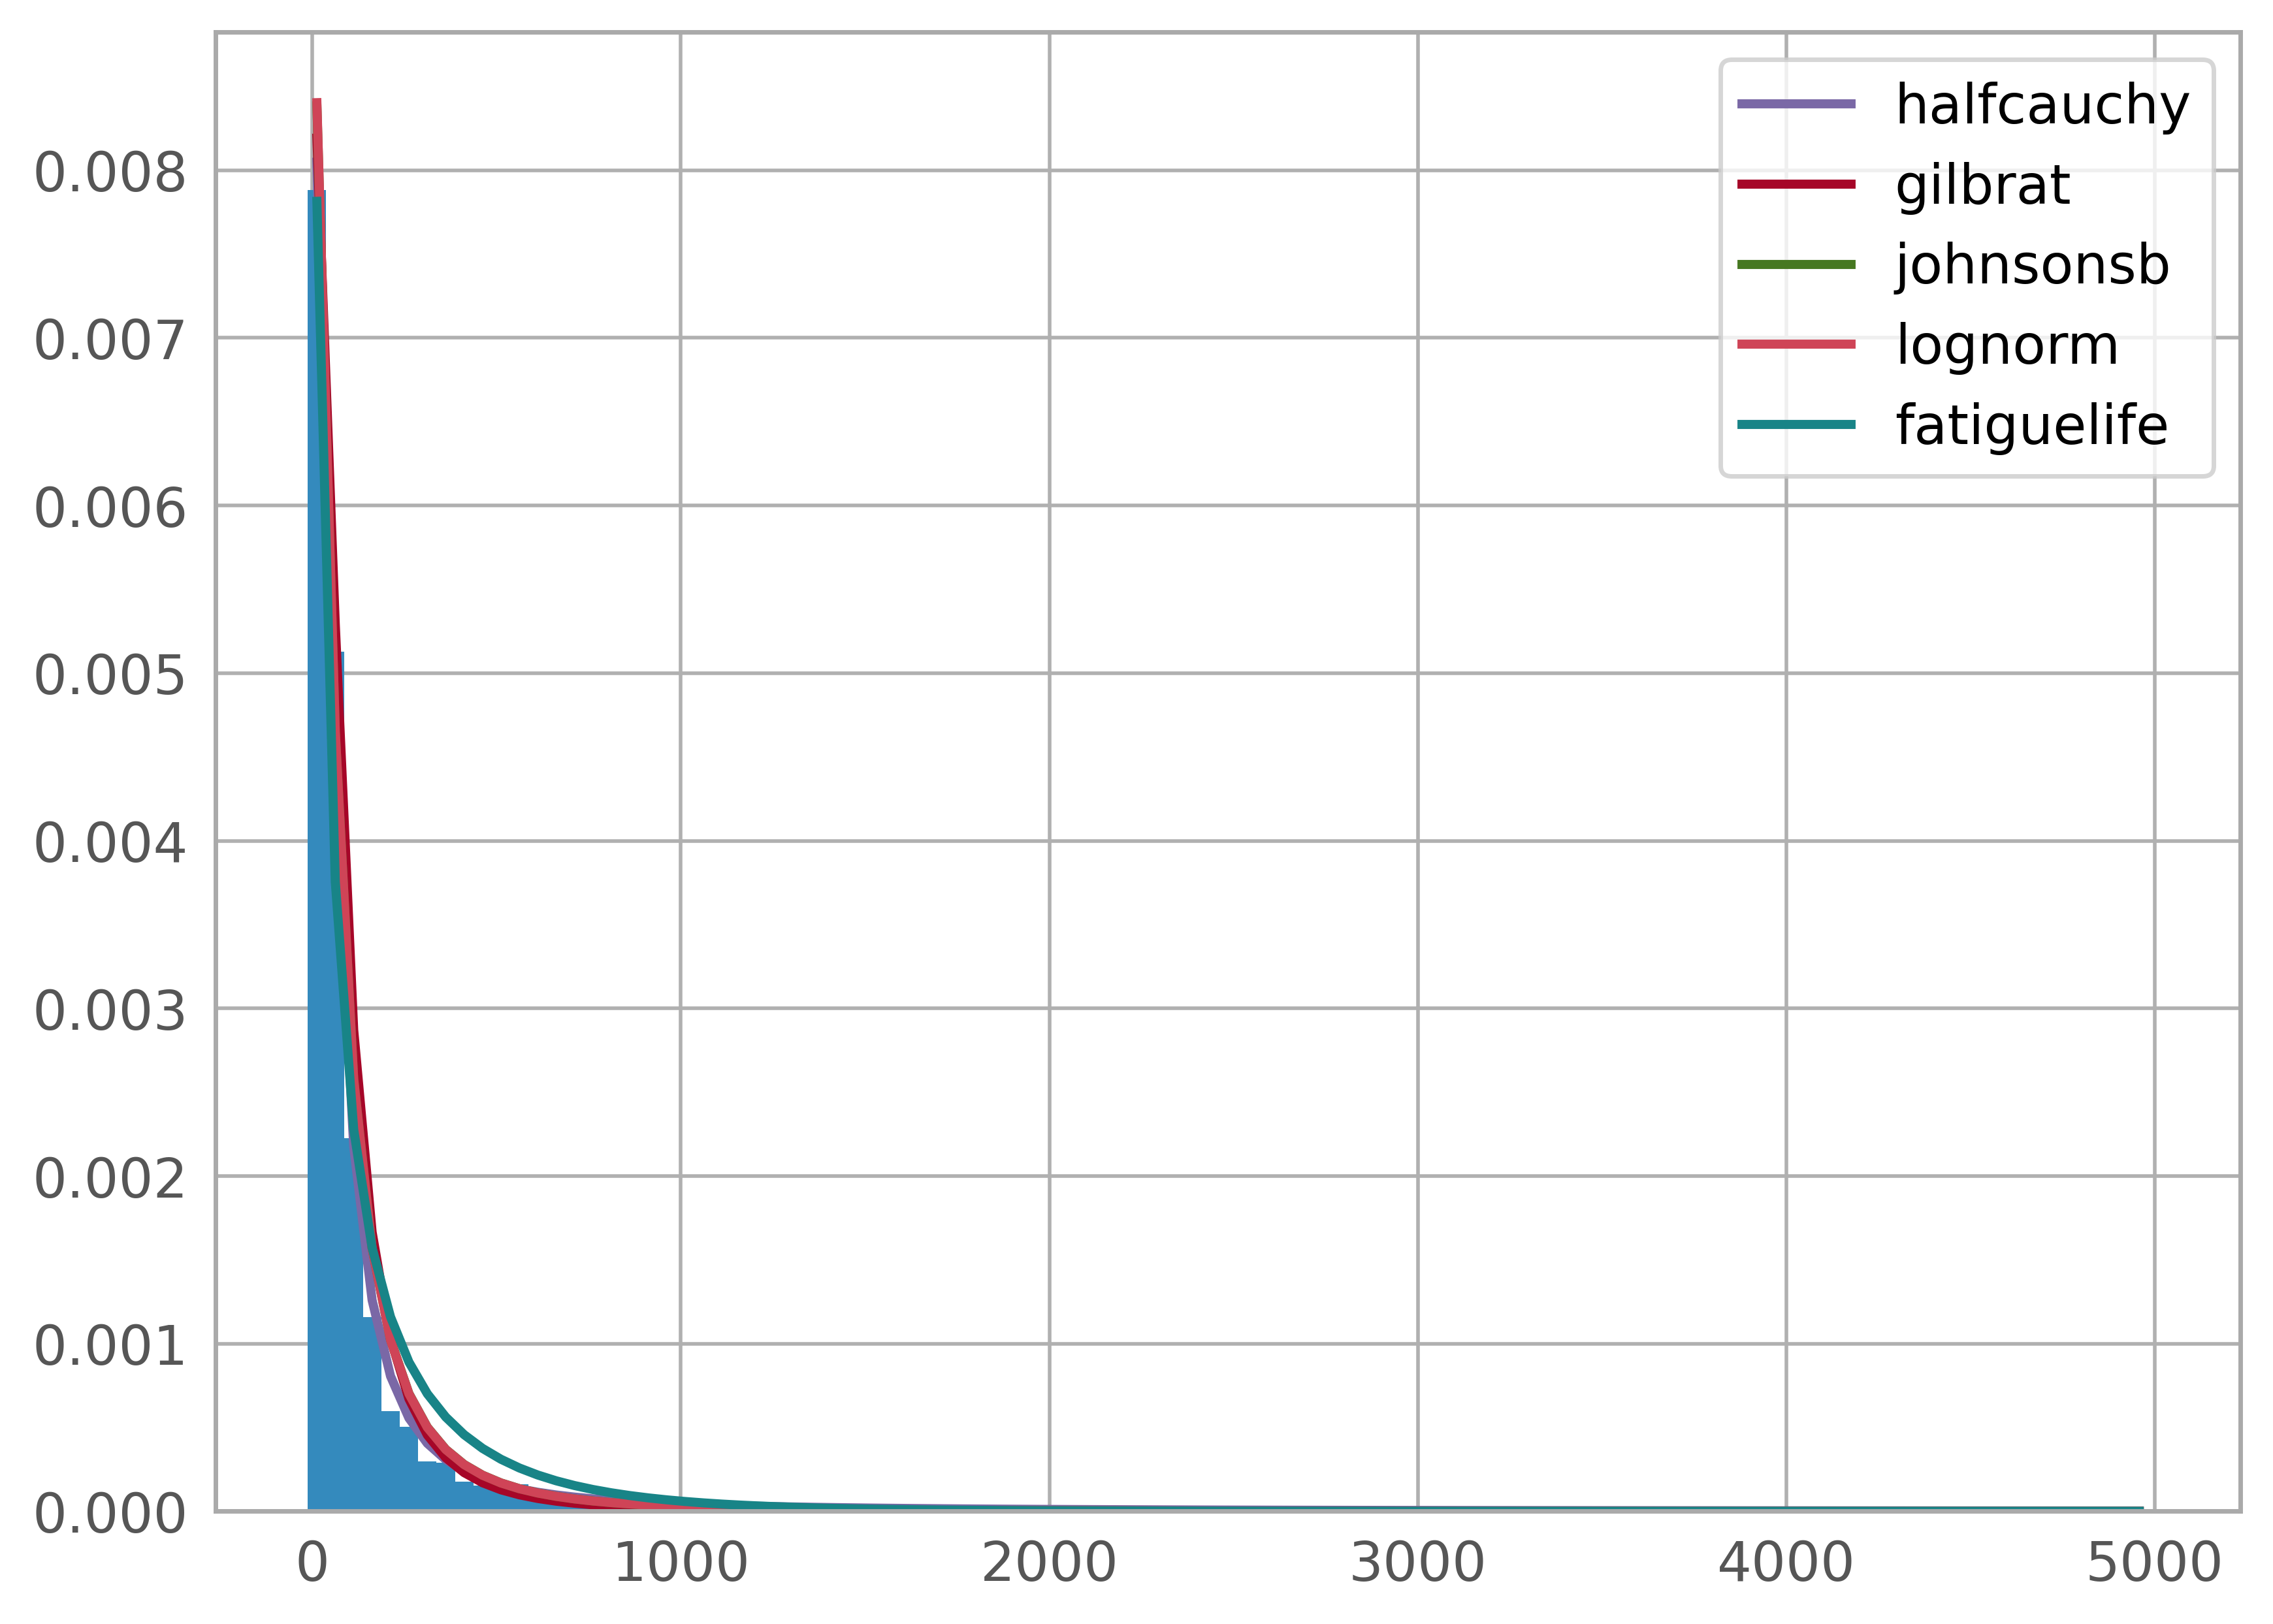

In [151]:
from fitter import Fitter
#distributions=['gamma',...]
f = Fitter(subset,timeout=120)
f.fit()
f.summary()

### Determine Threshold 

In [9]:
from astropy.visualization import astropy_mpl_style,make_lupton_rgb,imshow_norm
from astropy.visualization import SqrtStretch, LinearStretch,AsinhStretch,PowerStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib as mpl
plt.style.use(astropy_mpl_style)
mpl.rcParams['figure.dpi']= 500

In [10]:
from auto_stretch.stretch import Stretch
def show_fits(path, fname, ax, title, colorbar = True):
    image_file = os.path.join(path,fname)
    image_data = fits.open(image_file)[0].data # load data
    stretched_image = Stretch(target_bkg=0.25, shadows_clip=-1.25).stretch(image_data) # auto-stretch
    im, norm = imshow_norm(stretched_image,ax, origin='upper',cmap="gray") #plot/normalize pixel
    
    ax.title.set_text(title)
    
    if colorbar:
        plt.colorbar(im)
    
def plot_two_cutouts(f_name,hst_path,hsc_path):
    plt.figure(figsize=(8, 6),  facecolor='w', edgecolor='k')

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))


    show_fits(hst_path,f_name,ax[0],title = "HST")
    show_fits(hsc_path,f_name,ax[1],title = "HSC", colorbar = False)

<Figure size 4000x3000 with 0 Axes>

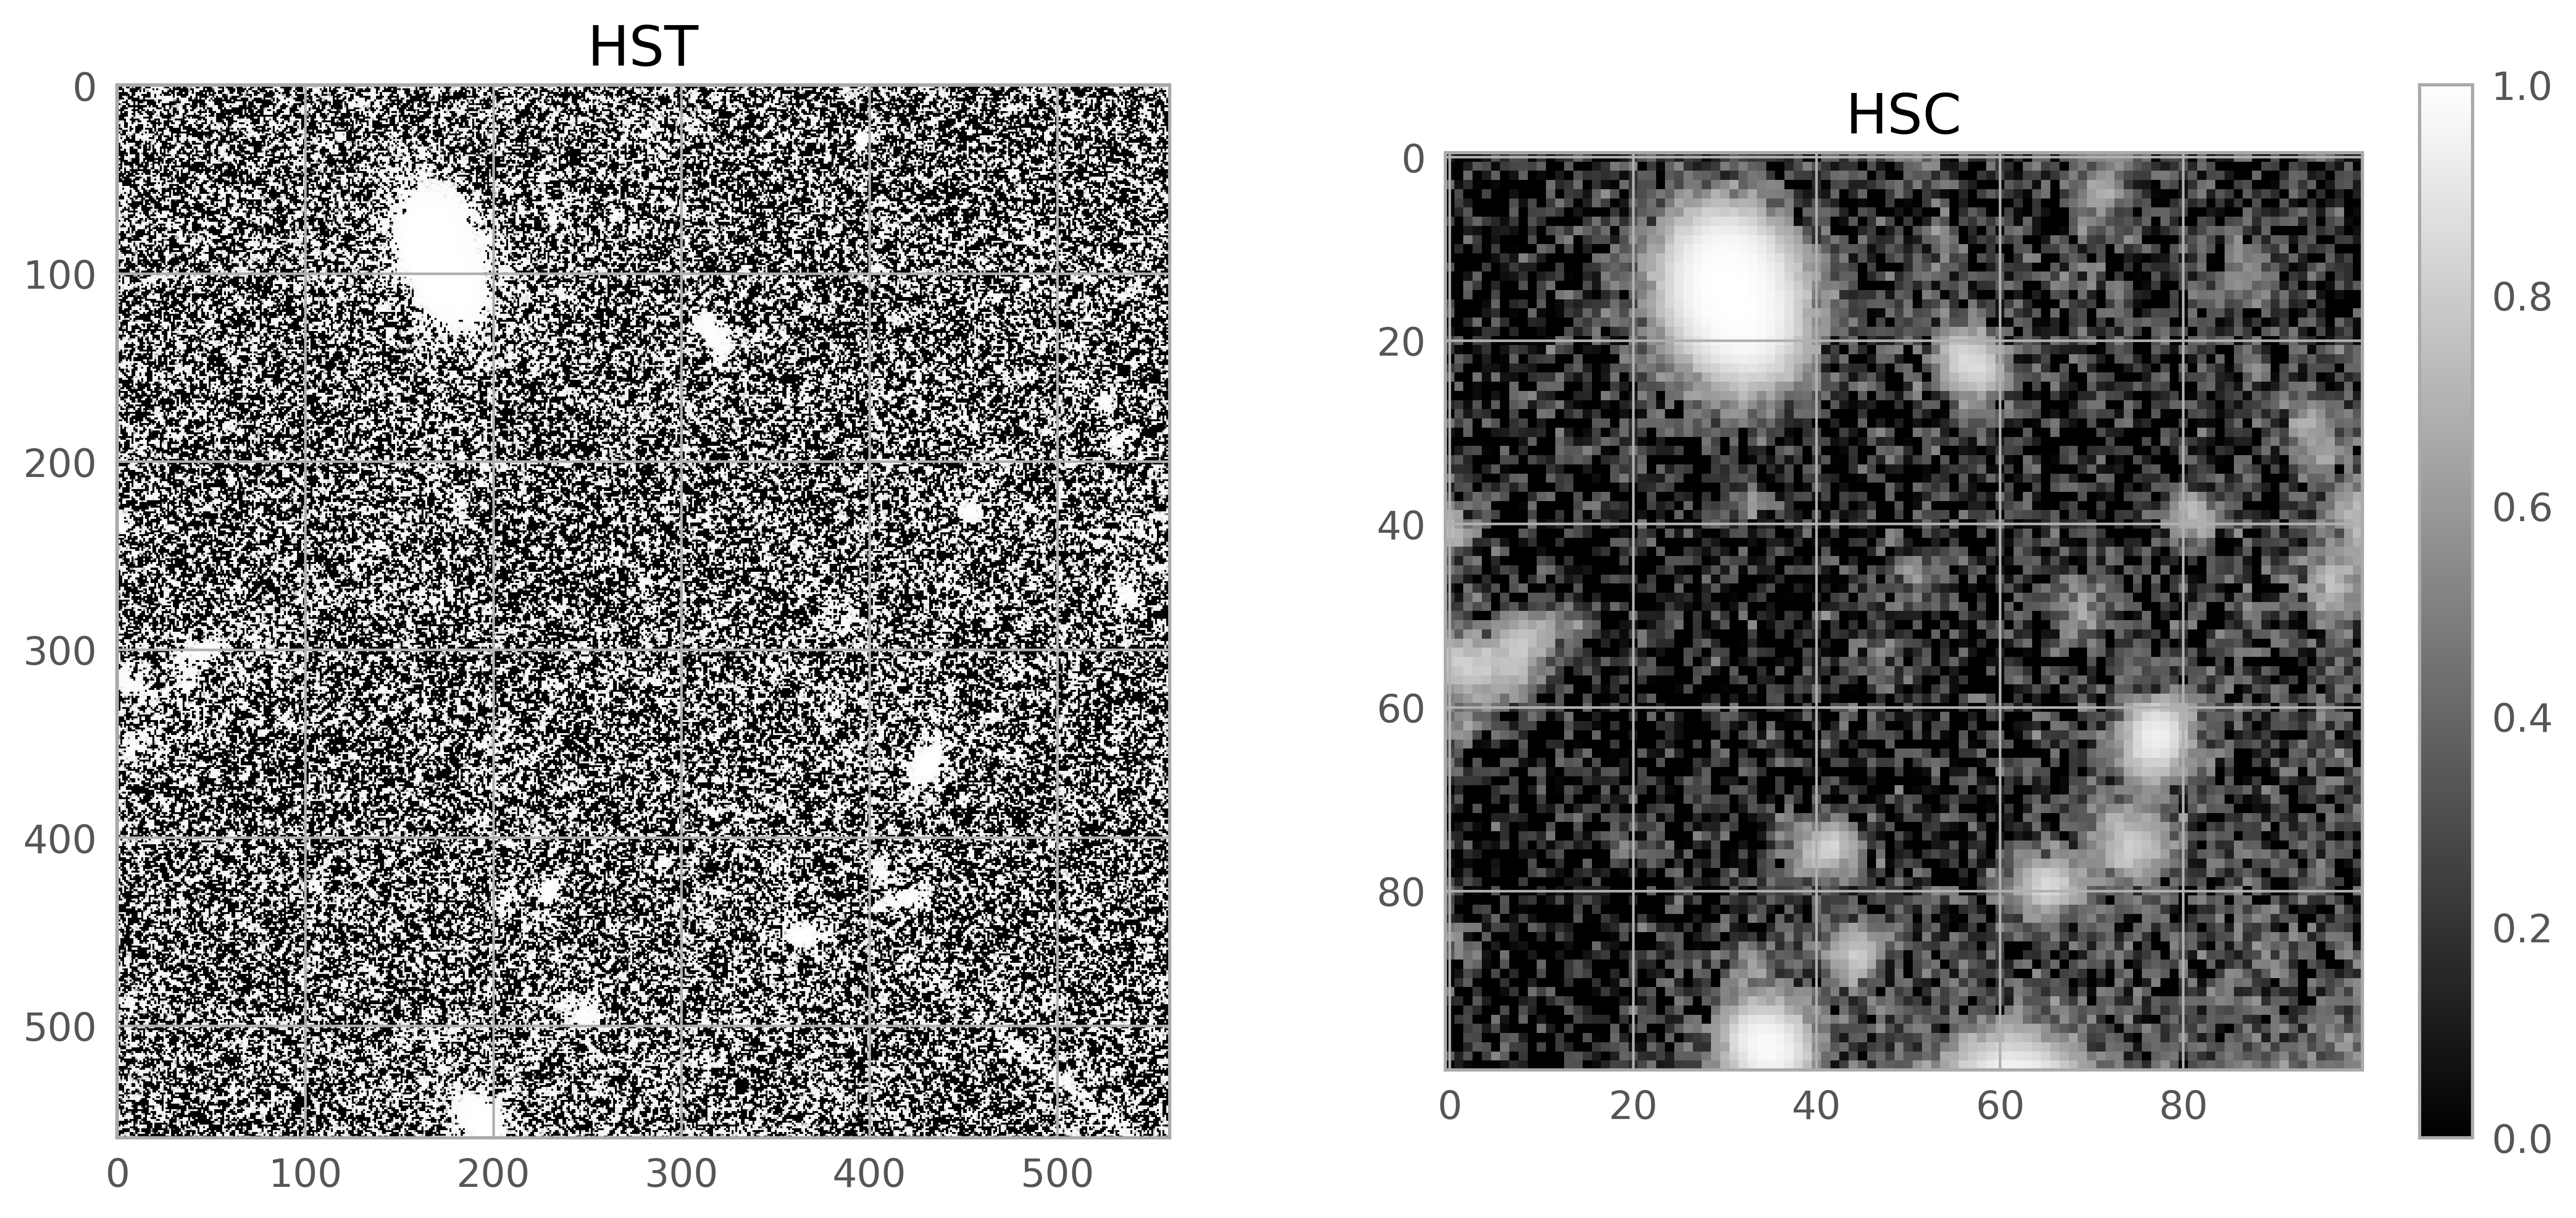

In [11]:
f_name = "1286.fits"
plot_two_cutouts(f_name,hst_path,hsc_path)

<Figure size 4000x3000 with 0 Axes>

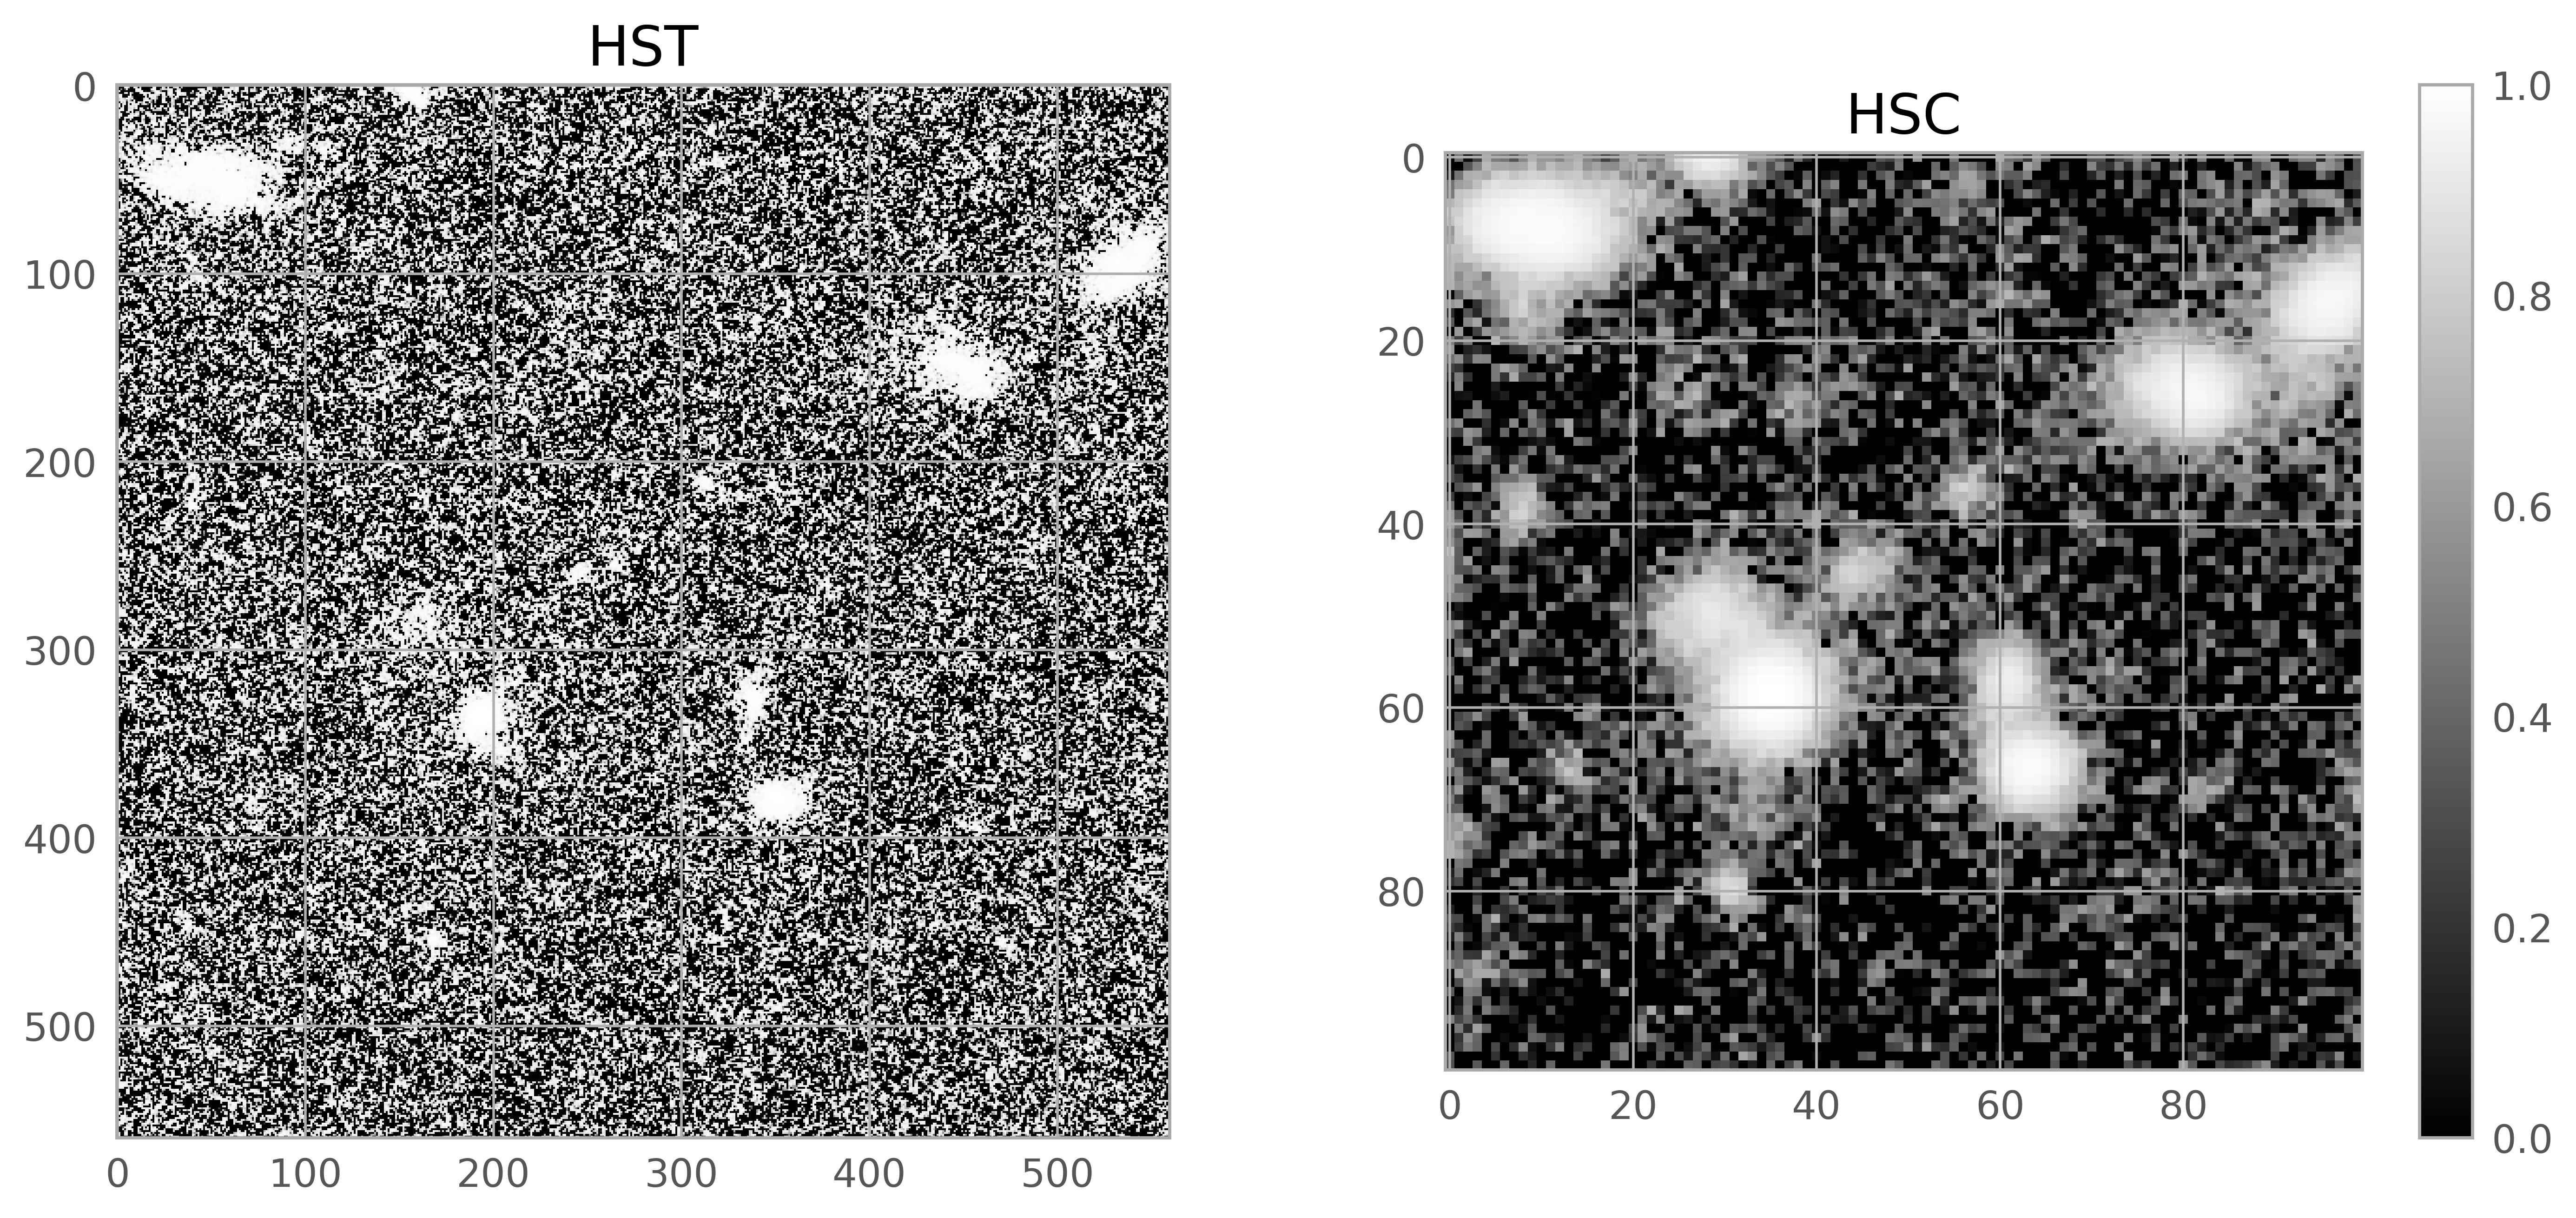

In [61]:
cutoff = 6.1
median = pixel_df[(pixel_df["log_sum"]>cutoff)&(pixel_df["log_sum"]<cutoff+1)].sort_values(by="log_sum").median()
f_name = pixel_df.iloc[(pixel_df['log_sum']-median["log_sum"]).abs().argsort()[:1]]["file"].iloc[0]
plot_two_cutouts(f_name,hst_path,hsc_path)

In [44]:
pixel_df[pixel_df["log_sum"]==median["log_sum"]]

,file,pixel_sum,log_sum


,file,pixel_sum,log_sum
1,4990.fits,5.341846,1.675571


In [40]:
pixel_df['log_sum']-median

0       5.706758
1       1.675571
2       3.093353
3       4.867632
4       4.814317
5       3.816486
6       2.608319
7       1.729200
8       3.022812
9       4.563913
10      5.371897
11      3.581071
12      4.096045
13      3.472308
14      2.652295
15      4.055633
16      3.344008
17      4.279354
18      3.643914
19      1.979836
20      4.340645
21      5.842607
22      2.464001
23      4.709497
24      9.396032
25      5.082250
26      9.140369
27      4.674921
28      2.737367
29      4.527634
          ...   
4970    0.922430
4971    3.483166
4972    3.620066
4973    4.099969
4974    5.163578
4975    4.837322
4976    4.106794
4977    3.299979
4978    3.352026
4979    6.224518
4980    7.068873
4981    3.376083
4982    5.141556
4983    4.580513
4984    4.521542
4985    2.876737
4986    4.394169
4987         NaN
4988    2.463773
4989    3.712457
4990    7.713361
4991    4.493032
4992    3.873858
4993    1.979630
4994    5.098267
4995    4.220628
4996    2.642040
4997    3.1735

In [63]:
x= """4
4
3
4
5
4
5
5
5
4
3
4
5
4
4
5
4
5
5
5
4
5
3
5
4
5
5
5
5
5
5
5"""

In [66]:
sum([int(num) for num in x.split()])

143